In this lab we will implement KMeans clustering algorithm. The computational complexity of this algo is linear in most of the cases with regard to the number of the instances, number of cluster and dimensions of the dataset. In worst case scenario, the complexity can increase exponentially with number of instances but this rarely happens.

#### Loading required packages to complete the lab

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

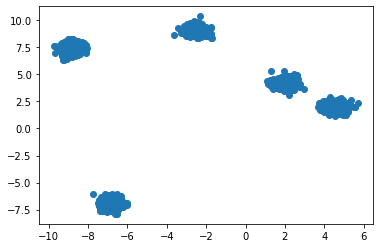

In [13]:
# Creating dataset for clustering problem
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=.35, random_state=42)

# Splitting our data into training set and new data set (futre data points)
X_train, X_new = train_test_split(X, test_size=.01)
# plotting training dataset
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In case of unsupervised leanring problem we won't have any label that represent the group of the customer i.e. we will only have X. As you see nn our dataset we know there are 5 cluster. Let's see how we can find out correct number of cluster using our clustering algorithms when only X is available and y will be missing. Assume we are having above dataset but we don't know how many clusters will be required to group the similar instance together into a similar groups.


Results of kmeans depends on how one initialize the centroids and might provide suboptimal solution if not centroids aren't initialized properly. Sklean handles this problem by providing two ways, one is to use the init methods to initialize the centroid and other is random intialization of centroids by 10 times (default is 10) using k-means++ initialization scheme [by default KMeans uses K-Means++](https://scikit-learn.org/stable/modules/clustering.html) and select the best solution based on the mean squared distance between each instance and its closest centroid i.e.  [within-cluster sum-of-squares](https://scikit-learn.org/stable/modules/clustering.html). Number of random initialization is control by n_init parameters in KMeans.  
You can set init to "random" to use the original k-means implementation which initialize n_clusters at random

In [0]:
# Our initial guess will be 4 cluster that can assist us to group the similar 
# instance together
clusters = 4
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(X_train)

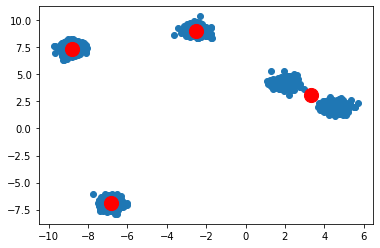

In [15]:
# plotting the centroids of each group
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

Now each instance has been assigned to one of the four clusters. Clusters are numbers from 0 to 3.  Let's have a look at the output for the first 20 instances.

In [16]:
y_pred[:20]

array([3, 1, 3, 2, 2, 1, 0, 2, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3, 0, 1],
      dtype=int32)

In [17]:
# Checking within-cluster sum of squares
kmeans.inertia_

1408.788426494341

As we know KMeans find n clusters centroids (n is number of cluster we ask our algo to consider) and assign each instance to the closest centroid. We can have a look at the four centroids that algorithms found


Note : Here we are into two dimensions so we need two data points to represents our centroids

In [18]:
kmeans.cluster_centers_ 

array([[-8.83338316,  7.34887161],
       [ 3.32887876,  3.07978777],
       [-6.80672085, -6.85949414],
       [-2.51677142,  9.0243679 ]])

#### Assign new instances to the cluster whose centroid is the closet

In [19]:
kmeans.predict(X_new)

array([2, 1, 1, 2, 1, 2, 0, 2, 1, 2], dtype=int32)

#### Kmeans measures the distance from each instance to every centroid and it can use seen using transform method. If you see below, first instance of X_new dataset is 6.4725 distance away from the centroid of group_0, 13.7044 distance away from the centroid of group_1, 1.9369 distance away from the centroid of group_3 and 10.97060 distance away from the centroid of group_4

In [20]:
kmeans.transform(X_new)

array([[14.07189367, 14.35135693,  0.48668282, 16.35263756],
       [11.29524813,  1.59756243, 13.48001042,  6.9905208 ],
       [11.26281635,  1.71775015, 14.0368727 ,  6.64429287],
       [13.95471089, 13.98528256,  0.39833963, 16.09898632],
       [14.07490761,  1.28986364, 14.296025  ,  9.62656558],
       [14.42752786, 14.09989498,  0.18991222, 16.45340732],
       [ 0.38228491, 12.95842023, 14.71633499,  6.38485741],
       [13.99234305, 14.2882605 ,  0.52063433, 16.27156713],
       [11.95956487,  1.23919551, 14.53059072,  7.13733826],
       [14.5013957 , 14.54381088,  0.35585544, 16.71658385]])

Finding the optimal number of clusters in kmeans.
One might be thinking that the model with lower within-cluster sum-of-squares score will be the best to decide how many cluster to pick to club the similar information together but this technique has some flaws and one of them is that as you increase the number of cluster the within-cluster-sum-of-squares score decrease.  Obviously more the number of clusters, the closer each instance will be to its closest centroid. So a more precise approach to select the number of cluster is silhouette score which is the mean [silhouette cofficient](https://en.wikipedia.org/wiki/Silhouette_(clustering)) over all the instances. 

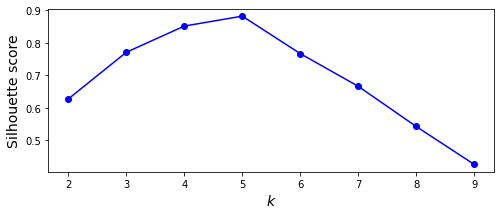

In [21]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

As you see above, 5 cluster is slightly a good choice to consider. So lets do kmeans using 5 clusters and plot the results 

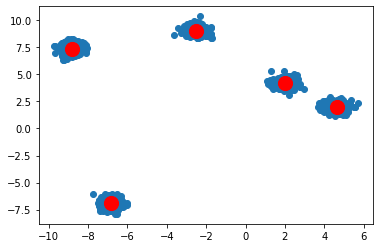

In [22]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X_train)
# plotting the centroids of each group
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()